In [2]:
import sys
import os

import pandas as pd
import numpy as np
from itertools import product

In [3]:
sys.path.insert(0, os.path.abspath('/home/jupyter/kaggle/predict_future_sales/src'))

import munging.process_data as process_data

In [4]:
INPUT_DATA_DIR = '/home/jupyter/kaggle/predict_future_sales/data/read_only'
PROCESSED_DATA_DIR = '/home/jupyter/kaggle/predict_future_sales/data/processed'

In [12]:
train_df = pd.read_feather(f'{PROCESSED_DATA_DIR}/train_processed.feather')
test_df = pd.read_feather(f'{PROCESSED_DATA_DIR}/test_processed.feather')
shops_df = pd.read_feather(f'{PROCESSED_DATA_DIR}/shops_processed.feather')
item_categories_df = pd.read_feather(f'{PROCESSED_DATA_DIR}/item_categories_processed.feather')
items_df = pd.read_feather(f'{PROCESSED_DATA_DIR}/items_processed.feather')
sample_submission_df = pd.read_feather(f'{PROCESSED_DATA_DIR}/submission_processed.feather')

In [14]:
train_df.shape, test_df.shape, shops_df.shape, item_categories_df.shape, items_df.shape, sample_submission_df.shape

((2935849, 6), (214200, 3), (60, 2), (84, 2), (22170, 3), (214200, 2))

In [15]:
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-01,0,18,5823,2500.0,1.0
1,2013-01-01,0,27,5573,849.0,1.0
2,2013-01-01,0,7,1006,399.0,1.0
3,2013-01-01,0,19,17707,899.0,1.0
4,2013-01-01,0,14,19548,149.0,1.0


In [ ]:
test_df.head()

In [16]:
item_categories_df.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [17]:
items_df.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [18]:
sample_submission_df.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [19]:
shops_df.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [5]:
def change_dtype(df, source_dtype, target_dtype):
    for col in df.select_dtypes([source_dtype]).columns:
        print(f'Changing dtype of [{col}] from [{source_dtype}] to [{target_dtype}]')
        df[col] = df[col].astype(target_dtype)
    return df

print('Changing data type of train data ..')
train_df.date = pd.to_datetime(train_df.date, format='%d.%m.%Y')
train_df.sort_values(['date'], inplace=True)

train_df = change_dtype(train_df, 'int64', 'int32')
train_df = change_dtype(train_df, 'float64', 'float32')

print('Changing data type of test  data ..')
test_df = change_dtype(test_df, 'int64', 'int32')

print('Changing data type of items  data ..')
items_df = change_dtype(items_df, 'int64', 'int32')

print('Changing data type of item categories  data ..')
item_categories_df = change_dtype(item_categories_df, 'int64', 'int32')

print('Changing data type of shops  data ..')
shops_df = change_dtype(shops_df, 'int64', 'int32')

print('Changing data type of submission  data ..')
sample_submission_df = change_dtype(sample_submission_df, 'int64', 'int32')
sample_submission_df = change_dtype(sample_submission_df, 'float64', 'float32')

Changing data type of train data ..
Changing dtype of [date_block_num] from [int64] to [int32]
Changing dtype of [shop_id] from [int64] to [int32]
Changing dtype of [item_id] from [int64] to [int32]
Changing dtype of [item_price] from [float64] to [float32]
Changing dtype of [item_cnt_day] from [float64] to [float32]
Changing data type of test  data ..
Changing dtype of [ID] from [int64] to [int32]
Changing dtype of [shop_id] from [int64] to [int32]
Changing dtype of [item_id] from [int64] to [int32]
Changing data type of items  data ..
Changing dtype of [item_id] from [int64] to [int32]
Changing dtype of [item_category_id] from [int64] to [int32]
Changing data type of item categories  data ..
Changing dtype of [item_category_id] from [int64] to [int32]
Changing data type of shops  data ..
Changing dtype of [shop_id] from [int64] to [int32]
Changing data type of submission  data ..
Changing dtype of [ID] from [int64] to [int32]
Changing dtype of [item_cnt_month] from [float64] to [floa

In [9]:
train_df.to_csv(f'{PROCESSED_DATA_DIR}/train_processed.csv', index=False)
test_df.to_csv(f'{PROCESSED_DATA_DIR}/test_processed.csv', index=False)
items_df.to_csv(f'{PROCESSED_DATA_DIR}/items_processed.csv', index=False)
item_categories_df.to_csv(f'{PROCESSED_DATA_DIR}/item_categories_processed.csv', index=False)
shops_df.to_csv(f'{PROCESSED_DATA_DIR}/shops_processed.csv', index=False)

In [8]:
pd.read_csv(f'{PROCESSED_DATA_DIR}/train_processed.csv').head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-01,0,18,5823,2500.0,1.0
1,2013-01-01,0,27,5573,849.0,1.0
2,2013-01-01,0,7,1006,399.0,1.0
3,2013-01-01,0,19,17707,899.0,1.0
4,2013-01-01,0,14,19548,149.0,1.0


In [74]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
ID         214200 non-null int64
shop_id    214200 non-null int64
item_id    214200 non-null int64
dtypes: int64(3)
memory usage: 4.9 MB


In [86]:
shops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
shop_name    60 non-null object
shop_id      60 non-null int32
dtypes: int32(1), object(1)
memory usage: 848.0+ bytes


In [83]:
item_categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
item_category_name    84 non-null object
item_category_id      84 non-null int32
dtypes: int32(1), object(1)
memory usage: 1.1+ KB


In [90]:
sample_submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 2 columns):
ID                214200 non-null int32
item_cnt_month    214200 non-null float32
dtypes: float32(1), int32(1)
memory usage: 1.6 MB


Changing dtype of [ID] from [int64] to [int32]
Changing dtype of [item_cnt_month] from [float64] to [float32]


In [76]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
ID         214200 non-null int32
shop_id    214200 non-null int32
item_id    214200 non-null int32
dtypes: int32(3)
memory usage: 2.5 MB


In [73]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 49800 to 2928850
Data columns (total 6 columns):
date              datetime64[ns]
date_block_num    int32
shop_id           int32
item_id           int32
item_price        float32
item_cnt_day      float32
dtypes: datetime64[ns](1), float32(2), int32(3)
memory usage: 100.8 MB


In [54]:
for col in train_df.select_dtypes(['int64']).columns:
    train_df[col] = train_df[col].astype('int32')

In [ ]:
train_df.date = pd.to_datetime(train_df.date, format='%d.%m.%Y')

train_df.sort_values(['date'], inplace=True)

train_df.date_block_num = train_df.date_block_num.astype('int32')
train_df.shop_id = train_df.shop_id.astype('int32')
train_df.item_id = train_df.item_id.astype('int32')
train_df.item_price = train_df.item_price.astype('float32')
train_df.item_cnt_day = train_df.item_cnt_day.astype('float32')



In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [22]:
train_df.date = pd.to_datetime(train_df.date, format='%d.%m.%Y')

train_df.sort_values(['date'], inplace=True)

train_df.date_block_num = train_df.date_block_num.astype('int32')
train_df.shop_id = train_df.shop_id.astype('int32')
train_df.item_id = train_df.item_id.astype('int32')
train_df.item_price = train_df.item_price.astype('float32')
train_df.item_cnt_day = train_df.item_cnt_day.astype('float32')

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 49800 to 2928850
Data columns (total 6 columns):
date              datetime64[ns]
date_block_num    int32
shop_id           int32
item_id           int32
item_price        float32
item_cnt_day      float32
dtypes: datetime64[ns](1), float32(2), int32(3)
memory usage: 100.8 MB


In [30]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
ID         214200 non-null int64
shop_id    214200 non-null int64
item_id    214200 non-null int64
dtypes: int64(3)
memory usage: 4.9 MB


In [44]:
test_df.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [32]:
test_df.ID = test_df.ID.astype('int32')
test_df.shop_id = test_df.shop_id.astype('int32')
test_df.item_id = test_df.item_id.astype('int32')

In [33]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
ID         214200 non-null int32
shop_id    214200 non-null int32
item_id    214200 non-null int32
dtypes: int32(3)
memory usage: 2.5 MB


In [34]:
items_df.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [36]:
items_df.item_id = items_df.item_id.astype('int32')
items_df.item_category_id = items_df.item_category_id.astype('int32')

In [37]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
item_name           22170 non-null object
item_id             22170 non-null int32
item_category_id    22170 non-null int32
dtypes: int32(2), object(1)
memory usage: 346.5+ KB


In [40]:
item_categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
item_category_name    84 non-null object
item_category_id      84 non-null int32
dtypes: int32(1), object(1)
memory usage: 1.1+ KB


In [39]:
item_categories_df.item_category_id = item_categories_df.item_category_id.astype('int32')

In [42]:
shops_df.shop_id = shops_df.shop_id.astype('int32')

In [43]:
shops_df.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [6]:
all_data = data_util.create_train_data(train_df)

/home/jupyter/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


In [7]:
all_data.head()

,shop_id,item_id,date_block_num,target
139255,0,19,0,0.0
141495,0,27,0,0.0
144968,0,28,0,0.0
142661,0,29,0,0.0
138947,0,32,0,6.0


In [59]:
index_cols = ['shop_id', 'item_id', 'date_block_num']

# For every month we create a grid from all shops/items combinations from that month
grid = [] 
for block_num in train_df['date_block_num'].unique():
    cur_shops = train_df[train_df['date_block_num']==block_num]['shop_id'].unique()
    cur_items = train_df[train_df['date_block_num']==block_num]['item_id'].unique()
    grid.append(np.array(list(product(*[cur_shops, cur_items, [block_num]])),dtype='int32'))
    
# Turn the grid into pandas dataframe
grid = pd.DataFrame(np.vstack(grid), columns = index_cols, dtype=np.int32)

# Get aggregated values for (shop_id, item_id, month)
gb = train_df.groupby(index_cols, as_index=False).agg({'item_cnt_day':{'target':'sum'}})

# Fix column names
gb.columns = [col[0] if col[-1]=='' else col[-1] for col in gb.columns.values]
# Join aggregated data to the grid
all_data = pd.merge(grid, gb, how='left', on=index_cols).fillna(0)
# Sort the data
all_data.sort_values(['date_block_num','shop_id','item_id'], inplace=True)

In [61]:
all_data.head()

,shop_id,item_id,date_block_num,target
139255,0,19,0,0.0
141495,0,27,0,0.0
144968,0,28,0,0.0
142661,0,29,0,0.0
138947,0,32,0,6.0


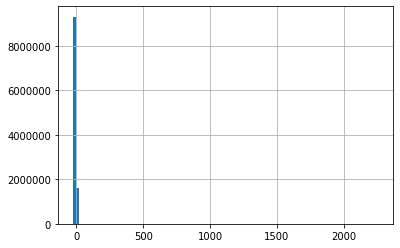

In [98]:
all_data.target.hist(bins=100);

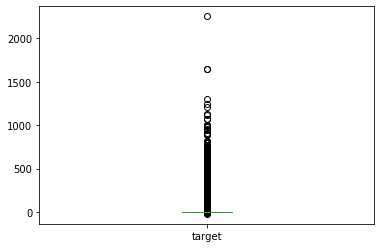

In [100]:
all_data.target.plot.box()

In [63]:
test_df = pd.read_csv(f'{DATA_DIR}/{READ_ONLY_DIR}/test.csv')

In [64]:
test_df.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [65]:
test_shop_list = list(test_df.shop_id.unique())

items_in_test_shop_5 = set(test_df[test_df.shop_id == 5]['item_id'].unique())

In [75]:
test_df[test_df.shop_id == 5].item_id.nunique()

5100

In [76]:
test_df[test_df.shop_id == 5].item_id.unique()

array([ 5037,  5320,  5233, ..., 15757, 19648,   969])

In [87]:
all_data[(all_data.shop_id == 5) & (all_data.date_block_num == 22)]['item_id'].unique()

array([    2,    11,    15, ..., 22146, 22166, 22167])

In [88]:
all_data[(all_data.shop_id == 5) & (all_data.date_block_num == 22)]['item_id'].nunique()

6322

In [89]:
items_in_train_shop_5 = set(all_data[(all_data.shop_id == 5) & (all_data.date_block_num == 22)]['item_id'].unique())

In [90]:
len(items_in_test_shop_5 - items_in_train_shop_5)

2627

In [91]:
len(items_in_train_shop_5 - items_in_test_shop_5)

3849